<a href="https://colab.research.google.com/github/ricardo-casa/Procesamiento-Digital-de-Imagenes/blob/main/Practicas/Practica2/Practica2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as img
import cv2
import numpy as np
import math 

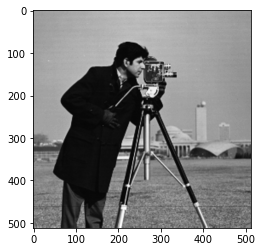

In [ ]:
image = plt.imread('cameraman.tif')
plt.imshow(image, cmap=plt.cm.gray)
plt.show()

In [ ]:
image.shape

(512, 512)

Ejercicio A : 'Cuantizacion uniforme i bit'

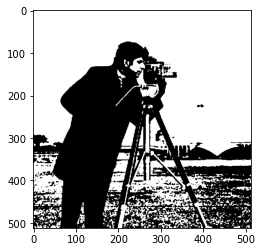

In [ ]:
'''
teniendo en cuenta que cada pixel tiene una profundidad de 8 bits, tendremos que convertirlo a 1 bit de modo que 
se representara por 2^1, teniendo asi la siguiente conversion 

(1/256)
'''

def uniform_quantization(image):
    onebit_image = []

    for pixel in image.reshape(-1):
        new_pixel = np.trunc((pixel/256) + 0.5)  #valor normalizado mas umbral
        onebit_image.append(new_pixel)

    onebit_image = np.array(onebit_image)
    return onebit_image.reshape(512,512)

onebit_image = uniform_quantization(image)
plt.imshow(onebit_image, cmap='gray')
plt.show()

Ejercicio B : 'Implementacion de Dithering Aleatorio'

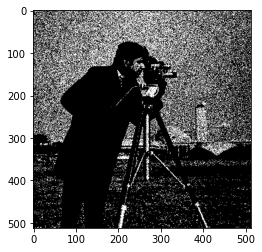

In [ ]:
'''formula = trunc(Image(x, y) + noise(x,y))
'''

def random_dithering(image):
    random_dithered_image = []

    for pixel in image.reshape(-1):
        new_pixel = pixel / 256  #normalizando el valor del pixel
        new_pixel = np.trunc(new_pixel + np.random.uniform(0,new_pixel))  #añadiendo ruido aleatorio
        random_dithered_image.append(new_pixel)

    random_dithered_image = np.array(random_dithered_image)
    return random_dithered_image.reshape(512,512)

random_dithered_image = random_dithering(image)
plt.imshow(random_dithered_image, cmap='gray')
plt.show()
        

Ejercicio C: 'Implementacion de dithering con matrices de 2x2 y 4x4 (Ordenado)'

In [ ]:
'''
codigo tomado de https://gist.github.com/olgierdh/41793bec77f064d81cf975387c749b4e
adaptado a la forma estipulada de la matriz de bayer 

caso recursivo tomando la base 2 de la matriz

en caso recursivo se descompondra en diferentes 'bases 2' sumando el resultado de las 
bases mas el complemento del caso base

por ultimo se le da un arreglo vertical
'''

def bayer_base():
    return np.matrix([[3.0, 1.0],[0.0, 2.0]])

def bayer(twon):
    n = twon / 2

    if n == 1:
        return bayer_base()

    m1 = bayer(n) * 4.0
    m2 = bayer(n) * 4.0
    m3 = bayer(n) * 4.0
    m4 = bayer(n) * 4.0

    m1 = m1 + np.full(m1.shape, 3.0)
    m2 = m2 + np.full(m2.shape, 1.0)
    m3 = m3 + np.full(m3.shape, 0.0)
    m4 = m4 + np.full(m4.shape, 2.0)

    h1 = np.hstack([m1, m2])
    h2 = np.hstack([m3, m4])

    return np.vstack([h1, h2])

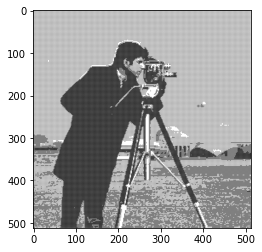

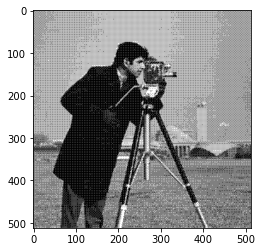

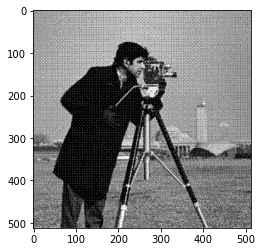

In [ ]:
from math import trunc
from skimage.util import view_as_blocks

def ordered_dithering(image, sample_shape=2):
    ordered_dithered_image = []

    D = bayer(sample_shape)

    for x in range(512):
        for y in range(512):
            i = x % (sample_shape)
            j = y % (sample_shape)
            e = image[x,y] / 256

            if (e > (D[i,j] * (1/sample_shape**2))): #comparacion con valores normalizados
                ordered_dithered_image.append(1)
            else:
                ordered_dithered_image.append(0)

    ordered_dithered_image = np.array(ordered_dithered_image)
    return ordered_dithered_image.reshape(512,512)

ordered_dithered_image = ordered_dithering(image,2)
plt.imshow(ordered_dithered_image, cmap='gray')
plt.show()

ordered_dithered_image = ordered_dithering(image,4)
plt.imshow(ordered_dithered_image, cmap='gray')
plt.show()

ordered_dithered_image = ordered_dithering(image,16)
plt.imshow(ordered_dithered_image, cmap='gray')
plt.show()

Ejercicio D: 'Implementacion de dithering con difusión del error de Floyd-Steinberg'

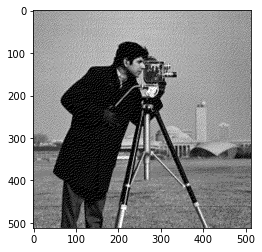

In [ ]:

def fs_dither(img):
    """
    Floyd-Steinberg dither the image img into a palette with nc colours per
    channel.

    """
    aux_image = np.array(img) / 256
    fs_image = np.array(img) / 256

    for x in range(511):
        for y in range(511):

            fs_image[x, y] = np.trunc(aux_image[x, y] + 0.5)
            err = aux_image[x, y] - fs_image[x, y]
            
            if x < 511:
                aux_image[x, y+1] += err * 7/16
            if y < 511:
                if x > 0:
                    aux_image[x+1, y-1] += err * 3/16
                    aux_image[x+1, y] += err * 5/16
                if x < 511:
                    aux_image[x+1, y+1] += err / 16
    return fs_image


fs = fs_dither(image)
plt.imshow(fs, cmap='gray')
plt.show()

In [ ]:
for p in fs : print(p)

[1.      0.      1.      1.      0.      1.      1.      0.      1.
 1.      0.      1.      1.      0.      1.      1.      0.      1.
 1.      0.      1.      1.      0.      1.      1.      0.      1.
 1.      0.      1.      1.      0.      1.      1.      0.      1.
 1.      0.      1.      1.      0.      1.      1.      0.      1.
 1.      0.      1.      1.      0.      1.      1.      0.      1.
 1.      0.      1.      1.      0.      1.      1.      0.      1.
 1.      0.      1.      1.      0.      1.      1.      0.      1.
 1.      0.      1.      1.      0.      1.      1.      0.      1.
 1.      0.      1.      1.      0.      1.      1.      0.      1.
 1.      0.      1.      1.      0.      1.      1.      0.      1.
 1.      0.      1.      1.      0.      1.      1.      0.      1.
 1.      0.      1.      1.      0.      1.      1.      0.      1.
 1.      0.      1.      1.      0.      1.      1.      1.      0.
 1.      1.      1.      0.      1.      1.     